In [1]:
import json
import torch
from PIL import Image
from sklearn.model_selection import train_test_split
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
with open("./data/processed_images/labels.json") as f:
    labels = json.load(f)

data = sorted(list(labels.keys()))

In [20]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])

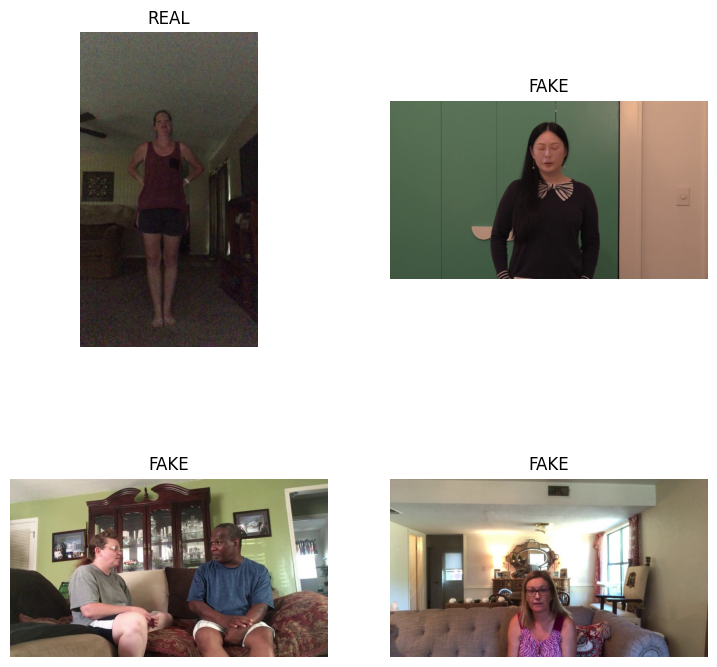

In [11]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 2, 2

images = []

for i in range(rows*cols):
    idx = torch.randint(0, len(data), size=[1]).item()
  
    img = data[idx]
    label = labels[img]

    img = Image.open(f"./data/processed_images/{img}.jpg")
    images.append((img, label))

    fig.add_subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis(False)

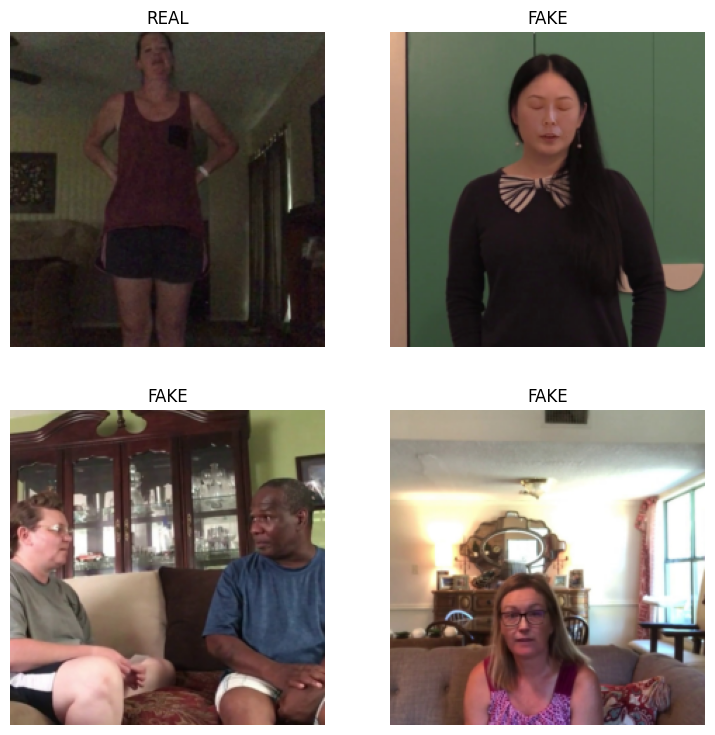

In [23]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 2, 2

i = 0

for img, label in images:
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(preprocess(img).permute(1, 2, 0))
    plt.title(label)
    plt.axis(False)

    i += 1